<a href="https://colab.research.google.com/github/sravani-1903/OPTIMIZATION-MODEL/blob/main/OPTIMIZATION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== PRODUCTION PLANNING OPTIMIZATION PROBLEM ===

Product Information:
    Product  Profit/Unit ($)  Machine Hours/Unit  Labor Hours/Unit  Material A/Unit  Material B/Unit  Max Demand
     Widget               40                 2.0               1.0                3                1         200
     Gadget               30                 1.5               2.0                2                3         300
Thingamajig               50                 3.0               1.5                4                2         150

Resource Constraints:
Machine Hours Available: 1000
Labor Hours Available: 800
Material A Available: 1200
Material B Available: 900

=== OPTIMIZATION MODEL ===
Decision Variables:
  units_Widget: Units of Widget to produce
  units_Gadget: Units of Gadget to produce
  units_Thingamajig: Units of Thingamajig to produce

Objective Function (Maximize):
Total Profit = 40 × Widget_units + 30 × Gadget_units + 50 × Thingamajig_units

Constraints:
1. Machine Hours: 2.0 × Widget + 

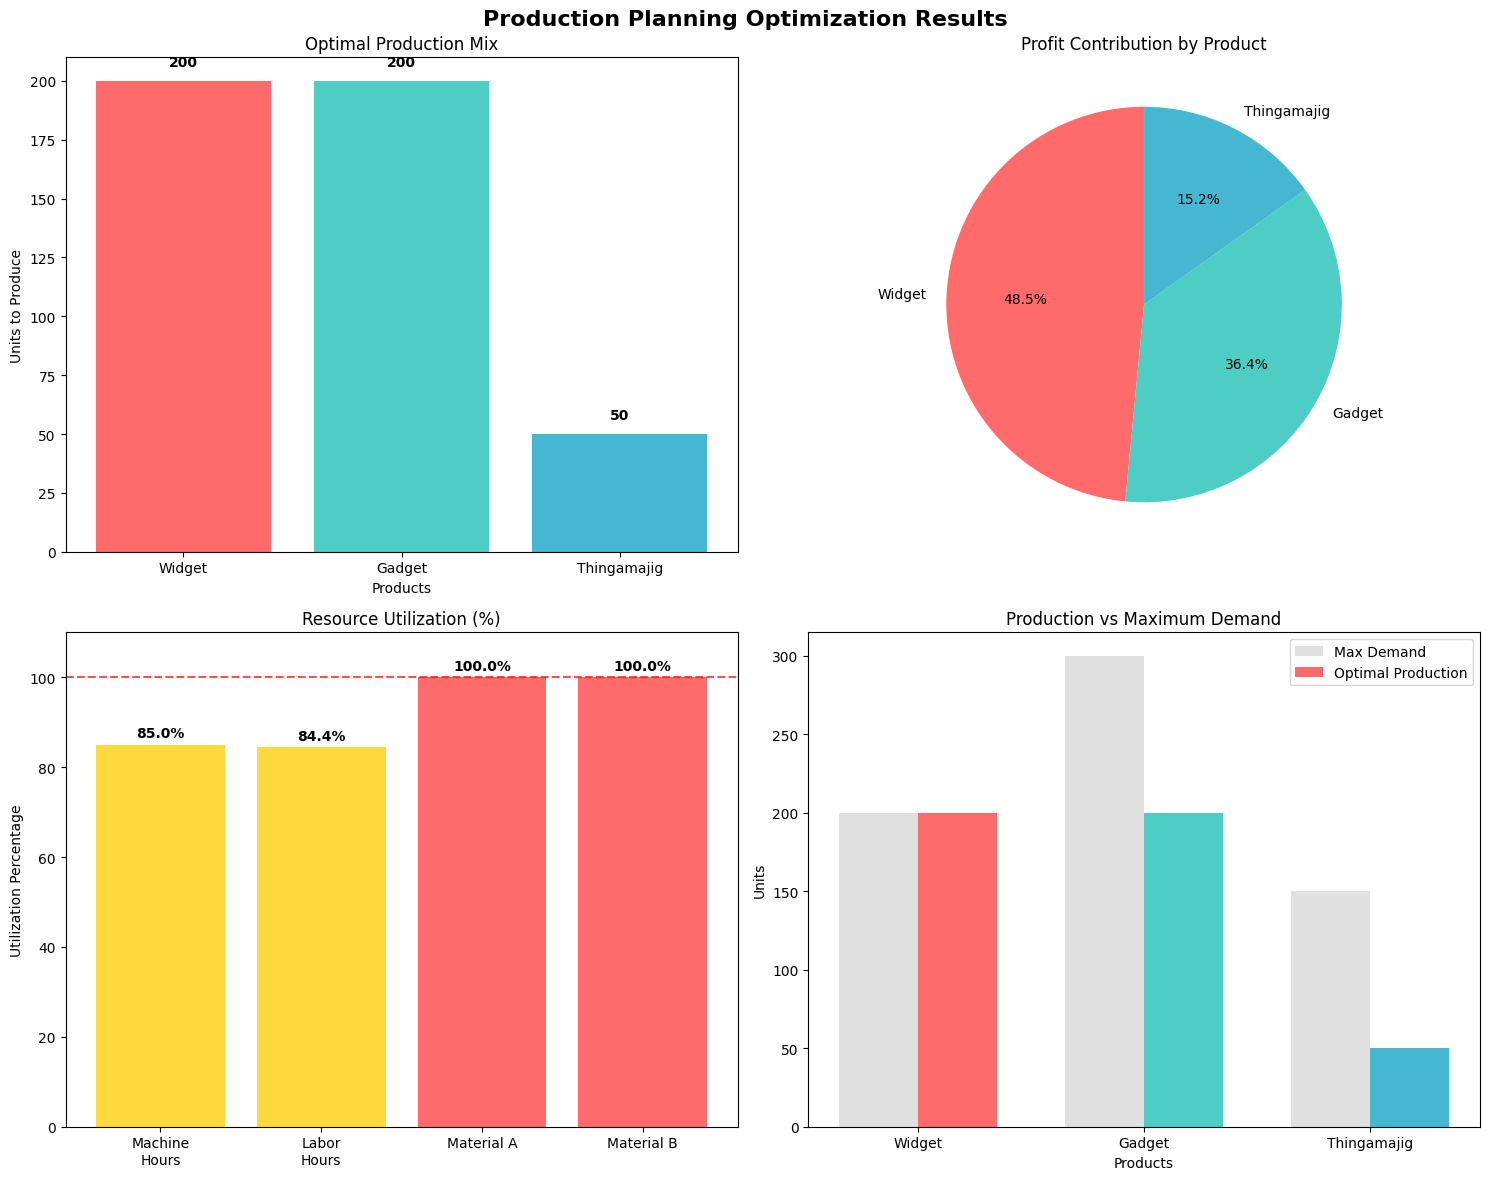


=== BUSINESS INSIGHTS AND RECOMMENDATIONS ===
Key Findings:
1. Maximum achievable monthly profit: $16,500
2. Optimal production mix:
   • Widget: 200 units (44.4% of total production)
   • Gadget: 200 units (44.4% of total production)
   • Thingamajig: 50 units (11.1% of total production)

3. Resource Constraints Analysis:
   • Most constraining resource: Material A (100.0% utilized)
   • Least constraining resource: Labor Hours (84.4% utilized)

4. Market Demand vs Production:
   • Widget: Meeting 100.0% of maximum demand
   • Gadget: Meeting 66.7% of maximum demand
   • Thingamajig: Meeting 33.3% of maximum demand

Strategic Recommendations:
1. Focus on bottleneck resources:
   • Consider increasing capacity for Material A
   • Consider increasing capacity for Material B
2. Product mix optimization:
   • Highest margin product (Thingamajig: $50/unit) should be prioritized, considering resource usage.
3. Capacity planning:
   • Some resources have excess capacity that could potential

In [3]:
# Production Planning Optimization Model
# Business Problem: Maximize profit while managing resource constraints

!pip install pulp # Ensure pulp is installed in this cell's environment

import pulp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# BUSINESS PROBLEM DEFINITION
# =============================================================================

"""
ACME Manufacturing Company produces three products: Widgets, Gadgets, and Thingamajigs.

Business Challenge:
- Limited production capacity (machine hours, labor hours, raw materials)
- Different profit margins for each product
- Need to determine optimal production mix to maximize profit

Constraints:
- Machine time: 1000 hours/month
- Labor time: 800 hours/month
- Raw material A: 1200 units/month
- Raw material B: 900 units/month
- Market demand limits for each product

Goal: Determine how many units of each product to manufacture to maximize monthly profit
"""

# =============================================================================
# DATA SETUP
# =============================================================================

# Product data
products = ['Widget', 'Gadget', 'Thingamajig']

# Profit per unit (in dollars)
profit_per_unit = {
    'Widget': 40,
    'Gadget': 30,
    'Thingamajig': 50
}

# Resource requirements per unit
machine_hours_per_unit = {
    'Widget': 2.0,
    'Gadget': 1.5,
    'Thingamajig': 3.0
}

labor_hours_per_unit = {
    'Widget': 1.0,
    'Gadget': 2.0,
    'Thingamajig': 1.5
}

material_A_per_unit = {
    'Widget': 3,
    'Gadget': 2,
    'Thingamajig': 4
}

material_B_per_unit = {
    'Widget': 1,
    'Gadget': 3,
    'Thingamajig': 2
}

# Resource availability (monthly limits)
machine_hours_available = 1000
labor_hours_available = 800
material_A_available = 1200
material_B_available = 900

# Market demand limits (maximum units that can be sold)
max_demand = {
    'Widget': 200,
    'Gadget': 300,
    'Thingamajig': 150
}

# Display problem data
print("=== PRODUCTION PLANNING OPTIMIZATION PROBLEM ===")
print("\nProduct Information:")
df_products = pd.DataFrame({
    'Product': products,
    'Profit/Unit ($)': [profit_per_unit[p] for p in products],
    'Machine Hours/Unit': [machine_hours_per_unit[p] for p in products],
    'Labor Hours/Unit': [labor_hours_per_unit[p] for p in products],
    'Material A/Unit': [material_A_per_unit[p] for p in products],
    'Material B/Unit': [material_B_per_unit[p] for p in products],
    'Max Demand': [max_demand[p] for p in products]
})
print(df_products.to_string(index=False))

print(f"\nResource Constraints:")
print(f"Machine Hours Available: {machine_hours_available}")
print(f"Labor Hours Available: {labor_hours_available}")
print(f"Material A Available: {material_A_available}")
print(f"Material B Available: {material_B_available}")

# =============================================================================
# OPTIMIZATION MODEL SETUP
# =============================================================================

# Create the optimization problem
prob = pulp.LpProblem("Production_Planning", pulp.LpMaximize)

# Decision variables: number of units to produce for each product
production_vars = {}
for product in products:
    production_vars[product] = pulp.LpVariable(
        f"units_{product}",
        lowBound=0,
        cat='Integer'  # Integer units
    )

print("\n=== OPTIMIZATION MODEL ===")
print("Decision Variables:")
for product in products:
    print(f"  {production_vars[product]}: Units of {product} to produce")

# =============================================================================
# OBJECTIVE FUNCTION
# =============================================================================

# Maximize total profit
total_profit = pulp.lpSum([
    profit_per_unit[product] * production_vars[product]
    for product in products
])
prob += total_profit

print(f"\nObjective Function (Maximize):")
print(f"Total Profit = ", end="")
for i, product in enumerate(products):
    if i > 0:
        print(" + ", end="")
    print(f"{profit_per_unit[product]} × {product}_units", end="")
print()

# =============================================================================
# CONSTRAINTS
# =============================================================================

print(f"\nConstraints:")

# 1. Machine hours constraint
machine_constraint = pulp.lpSum([
    machine_hours_per_unit[product] * production_vars[product]
    for product in products
]) <= machine_hours_available

prob += machine_constraint
print(f"1. Machine Hours: ", end="")
for i, product in enumerate(products):
    if i > 0:
        print(" + ", end="")
    print(f"{machine_hours_per_unit[product]} × {product}", end="")
print(f" ≤ {machine_hours_available}")

# 2. Labor hours constraint
labor_constraint = pulp.lpSum([
    labor_hours_per_unit[product] * production_vars[product]
    for product in products
]) <= labor_hours_available

prob += labor_constraint
print(f"2. Labor Hours: ", end="")
for i, product in enumerate(products):
    if i > 0:
        print(" + ", end="")
    print(f"{labor_hours_per_unit[product]} × {product}", end="")
print(f" ≤ {labor_hours_available}")

# 3. Material A constraint
material_A_constraint = pulp.lpSum([
    material_A_per_unit[product] * production_vars[product]
    for product in products
]) <= material_A_available

prob += material_A_constraint
print(f"3. Material A: ", end="")
for i, product in enumerate(products):
    if i > 0:
        print(" + ", end="")
    print(f"{material_A_per_unit[product]} × {product}", end="")
print(f" ≤ {material_A_available}")

# 4. Material B constraint
material_B_constraint = pulp.lpSum([
    material_B_per_unit[product] * production_vars[product]
    for product in products
]) <= material_B_available

prob += material_B_constraint
print(f"4. Material B: ", end="")
for i, product in enumerate(products):
    if i > 0:
        print(" + ", end="")
    print(f"{material_B_per_unit[product]} × {product}", end="")
print(f" ≤ {material_B_available}")

# 5. Demand constraints
for product in products:
    demand_constraint = production_vars[product] <= max_demand[product]
    prob += demand_constraint
    print(f"5. {product} Demand: {product}_units ≤ {max_demand[product]}")

# 6. Non-negativity constraints (already handled by lowBound=0)

# =============================================================================
# SOLVE THE OPTIMIZATION PROBLEM
# =============================================================================

print("\n=== SOLVING THE OPTIMIZATION PROBLEM ===")
print("Status: Solving...")

# Solve the problem
prob.solve()

# Check the solution status
status = pulp.LpStatus[prob.status]
print(f"Solution Status: {status}")

if status == 'Optimal':
    print("✓ Optimal solution found!")
else:
    print("✗ No optimal solution found")
    # Remove the exit() call as it terminates the notebook kernel
    # exit()

# =============================================================================
# SOLUTION ANALYSIS
# =============================================================================

# Only proceed with analysis if an optimal solution was found
if status == 'Optimal':
    print(f"\n=== OPTIMAL SOLUTION ===")

    # Extract optimal production quantities
    optimal_production = {}
    for product in products:
        # Use varValue attribute to get the optimal value
        optimal_production[product] = int(production_vars[product].varValue)

    # Display optimal production plan
    print("Optimal Production Plan:")
    total_optimal_profit = 0
    for product in products:
        units = optimal_production[product]
        profit = units * profit_per_unit[product]
        total_optimal_profit += profit
        print(f"  {product}: {units} units (Profit: ${profit:,})")

    print(f"\nMaximum Total Profit: ${total_optimal_profit:,}")

    # =============================================================================
    # RESOURCE UTILIZATION ANALYSIS
    # =============================================================================

    print(f"\n=== RESOURCE UTILIZATION ANALYSIS ===")

    # Calculate resource usage
    machine_hours_used = sum(
        machine_hours_per_unit[product] * optimal_production[product]
        for product in products
    )
    labor_hours_used = sum(
        labor_hours_per_unit[product] * optimal_production[product]
        for product in products
    )
    material_A_used = sum(
        material_A_per_unit[product] * optimal_production[product]
        for product in products
    )
    material_B_used = sum(
        material_B_per_unit[product] * optimal_production[product]
        for product in products
    )

    # Resource utilization summary
    resource_data = {
        'Resource': ['Machine Hours', 'Labor Hours', 'Material A', 'Material B'],
        'Used': [machine_hours_used, labor_hours_used, material_A_used, material_B_used],
        'Available': [machine_hours_available, labor_hours_available, material_A_available, material_B_available],
        'Utilization %': [
            (machine_hours_used/machine_hours_available)*100 if machine_hours_available > 0 else 0, # Handle division by zero
            (labor_hours_used/labor_hours_available)*100 if labor_hours_available > 0 else 0,       # Handle division by zero
            (material_A_used/material_A_available)*100 if material_A_available > 0 else 0,         # Handle division by zero
            (material_B_used/material_B_available)*100 if material_B_available > 0 else 0          # Handle division by zero
        ],
        'Slack': [
            machine_hours_available - machine_hours_used,
            labor_hours_available - labor_hours_used,
            material_A_available - material_A_used,
            material_B_available - material_B_used
        ]
    }

    df_resources = pd.DataFrame(resource_data)
    df_resources['Utilization %'] = df_resources['Utilization %'].round(1)
    print(df_resources.to_string(index=False))

    # =============================================================================
    # SENSITIVITY ANALYSIS
    # =============================================================================

    print(f"\n=== SENSITIVITY ANALYSIS ===")

    # Identify binding constraints (constraints that are fully utilized)
    binding_constraints = []
    # Use small tolerance for floating point comparison
    tolerance = 1e-9
    if abs(machine_hours_used - machine_hours_available) < tolerance:
        binding_constraints.append("Machine Hours")
    if abs(labor_hours_used - labor_hours_available) < tolerance:
        binding_constraints.append("Labor Hours")
    if abs(material_A_used - material_A_available) < tolerance:
        binding_constraints.append("Material A")
    if abs(material_B_used - material_B_available) < tolerance:
        binding_constraints.append("Material B")

    print("Binding Constraints (fully utilized resources):")
    if binding_constraints:
        for constraint in binding_constraints:
            print(f"  • {constraint}")
    else:
        print("  • None (all resources have slack or capacity)")

    print("\nNon-binding Constraints (resources with slack):")
    slack_constraints = []
    if machine_hours_used < machine_hours_available - tolerance:
        slack_constraints.append(f"Machine Hours ({machine_hours_available - machine_hours_used:.2f} hours slack)")
    if labor_hours_used < labor_hours_available - tolerance:
        slack_constraints.append(f"Labor Hours ({labor_hours_available - labor_hours_used:.2f} hours slack)")
    if material_A_used < material_A_available - tolerance:
        slack_constraints.append(f"Material A ({material_A_available - material_A_used:.2f} units slack)")
    if material_B_used < material_B_available - tolerance:
        slack_constraints.append(f"Material B ({material_B_available - material_B_used:.2f} units slack)")


    if slack_constraints:
        for constraint in slack_constraints:
            print(f"  • {constraint}")
    else:
        print("  • None (all resources are fully utilized)")


    # Optional: Display Shadow Prices (Dual Values) for binding constraints
    print("\nShadow Prices (Value of one additional unit of resource):")
    for name, constraint in prob.constraints.items():
         # Check if the constraint is binding or has a shadow price
         # LpConstraint.pi contains the shadow price
         if abs(constraint.pi) > tolerance: # Check if shadow price is significantly non-zero
             print(f"  • {name}: ${constraint.pi:.2f}")
         else:
             # You could optionally print resources with zero shadow price too
             pass
    if not any(abs(constraint.pi) > tolerance for constraint in prob.constraints.values()):
         print("  • No binding constraints with non-zero shadow prices found.")


    # =============================================================================
    # VISUALIZATION
    # =============================================================================

    print(f"\n=== CREATING VISUALIZATIONS ===")

    # Create visualizations
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Production Planning Optimization Results', fontsize=16, fontweight='bold')

    # 1. Optimal Production Mix
    ax1.bar(products, [optimal_production[p] for p in products],
            color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax1.set_title('Optimal Production Mix')
    ax1.set_ylabel('Units to Produce')
    ax1.set_xlabel('Products')
    for i, product in enumerate(products):
        ax1.text(i, optimal_production[product] + 5, str(optimal_production[product]),
                 ha='center', va='bottom', fontweight='bold')

    # 2. Profit Contribution by Product
    profits = [optimal_production[p] * profit_per_unit[p] for p in products]
    ax2.pie(profits, labels=products, autopct='%1.1f%%', startangle=90,
            colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax2.set_title('Profit Contribution by Product')

    # 3. Resource Utilization
    resources = ['Machine\nHours', 'Labor\nHours', 'Material A', 'Material B']
    utilization = df_resources['Utilization %'].values
    colors = ['#FF6B6B' if x >= 99 else '#FFD93D' if x >= 80 else '#6BCF7F' for x in utilization] # Adjusted thresholds slightly
    bars = ax3.bar(resources, utilization, color=colors)
    ax3.set_title('Resource Utilization (%)')
    ax3.set_ylabel('Utilization Percentage')
    ax3.axhline(y=100, color='red', linestyle='--', alpha=0.7)
    ax3.set_ylim(0, 110)
    for bar, util in zip(bars, utilization):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{util:.1f}%', ha='center', va='bottom', fontweight='bold')

    # 4. Profit vs Demand Comparison
    max_demands = [max_demand[p] for p in products]
    actual_production = [optimal_production[p] for p in products]
    x = np.arange(len(products))
    width = 0.35

    ax4.bar(x - width/2, max_demands, width, label='Max Demand', alpha=0.7, color='lightgray')
    ax4.bar(x + width/2, actual_production, width, label='Optimal Production',
            color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax4.set_title('Production vs Maximum Demand')
    ax4.set_ylabel('Units')
    ax4.set_xlabel('Products')
    ax4.set_xticks(x)
    ax4.set_xticklabels(products)
    ax4.legend()

    plt.tight_layout()
    plt.show()

    # =============================================================================
    # BUSINESS INSIGHTS AND RECOMMENDATIONS
    # =============================================================================

    print(f"\n=== BUSINESS INSIGHTS AND RECOMMENDATIONS ===")

    print("Key Findings:")
    print(f"1. Maximum achievable monthly profit: ${total_optimal_profit:,}")
    print("2. Optimal production mix:")
    total_prod_units = sum(optimal_production.values())
    if total_prod_units > 0: # Avoid division by zero if no production
        for product in products:
            percentage = (optimal_production[product] / total_prod_units) * 100
            print(f"   • {product}: {optimal_production[product]} units ({percentage:.1f}% of total production)")
    else:
        print("   • No production is recommended given constraints.")


    print(f"\n3. Resource Constraints Analysis:")
    if not df_resources.empty: # Check if the resource DataFrame was created
        most_utilized_row = df_resources.loc[df_resources['Utilization %'].idxmax()]
        least_utilized_row = df_resources.loc[df_resources['Utilization %'].idxmin()]
        print(f"   • Most constraining resource: {most_utilized_row['Resource']} ({most_utilized_row['Utilization %']:.1f}% utilized)")
        print(f"   • Least constraining resource: {least_utilized_row['Resource']} ({least_utilized_row['Utilization %']:.1f}% utilized)")
    else:
        print("   • Resource utilization data not available.")


    print(f"\n4. Market Demand vs Production:")
    for product in products:
        if max_demand[product] > 0: # Avoid division by zero
            demand_fill = (optimal_production[product] / max_demand[product]) * 100
            print(f"   • {product}: Meeting {demand_fill:.1f}% of maximum demand")
        else:
             print(f"   • {product}: No market demand specified.")


    print(f"\nStrategic Recommendations:")
    print("1. Focus on bottleneck resources:")
    if binding_constraints:
        for constraint in binding_constraints:
            print(f"   • Consider increasing capacity for {constraint}")
    else:
        print("   • No fully binding resource constraints based on this model.")

    print("2. Product mix optimization:")
    if profit_per_unit: # Check if profit data exists
        profit_per_unit_sorted = sorted(profit_per_unit.items(), key=lambda x: x[1], reverse=True)
        if profit_per_unit_sorted:
             print(f"   • Highest margin product ({profit_per_unit_sorted[0][0]}: ${profit_per_unit_sorted[0][1]}/unit) should be prioritized, considering resource usage.")
        else:
            print("   • Profit data not available.")
    else:
        print("   • Profit data not available.")

    print("3. Capacity planning:")
    if slack_constraints:
        print("   • Some resources have excess capacity that could potentially be reallocated or reduced.")
    else:
        print("   • All major resources are fully utilized, suggesting capacity increases might be necessary to increase production/profit.")


    print("\n4. What-if scenarios to consider:")
    print("   • Impact of increasing bottleneck resource capacity (use shadow prices for quick estimates)")
    print("   • Effect of changing product prices or costs")
    print("   • Sensitivity to demand fluctuations")


   # =============================================================================
# MODEL VALIDATION
# =============================================================================

print(f"\n=== MODEL VALIDATION ===")

print("Constraint Verification:")
constraints_satisfied = True

# Check all constraints
# Using tolerance for floating point comparisons
tolerance = 1e-9 # Define tolerance here if not already defined

if machine_hours_used <= machine_hours_available + tolerance:
    print(f"✓ Machine hours: {machine_hours_used:.2f} ≤ {machine_hours_available}")
else:
    print(f"✗ Machine hours constraint violated: {machine_hours_used:.2f} > {machine_hours_available}")
    constraints_satisfied = False

if labor_hours_used <= labor_hours_available + tolerance:
    print(f"✓ Labor hours: {labor_hours_used:.2f} ≤ {labor_hours_available}")
else:
    print(f"✗ Labor hours constraint violated: {labor_hours_used:.2f} > {labor_hours_available}")
    constraints_satisfied = False

if material_A_used <= material_A_available + tolerance:
    print(f"✓ Material A: {material_A_used:.2f} ≤ {material_A_available}")
else:
    print(f"✗ Material A constraint violated: {material_A_used:.2f} > {material_A_available}")
    constraints_satisfied = False

if material_B_used <= material_B_available + tolerance:
    print(f"✓ Material B: {material_B_used:.2f} ≤ {material_B_available}")
else:
    print(f"✗ Material B constraint violated: {material_B_used:.2f} > {material_B_available}")
    constraints_satisfied = False

# Check demand constraints
for product in products:
    # Check if max_demand[product] exists and is non-zero before checking constraint
    if product in max_demand:
        if optimal_production[product] <= max_demand[product] + tolerance:
            print(f"✓ {product} demand: {optimal_production[product]} ≤ {max_demand[product]}")
        else:
            print(f"✗ {product} demand constraint violated: {optimal_production[product]} > {max_demand[product]}")
            constraints_satisfied = False
    else:
        # If max_demand is not specified for a product, assume no upper limit or handle as error
        print(f"ℹ️ Warning: No maximum demand specified for {product}.")


if constraints_satisfied:
    print("\n✓ All constraints satisfied within tolerance - Solution is feasible")
else:
    print("\n✗ Some constraints violated - Check model formulation and solution")

print(f"\nModel Summary:")
print(f"• Decision variables: {len(production_vars)} (production quantities)")
# Counting constraints more robustly
num_resource_constraints = sum(1 for name in prob.constraints if 'constraint' in name.lower()) # Heuristic for resource constraints
num_demand_constraints = sum(1 for name in prob.constraints if 'demand_constraint' in name.lower()) # Heuristic for demand constraints
print(f"• Constraints: {len(prob.constraints)} ({num_resource_constraints} resource + {num_demand_constraints} demand)")
print(f"• Objective: Maximize profit")
# Corrected line to get the solver name from the solved problem object
print(f"• Solution method: Linear Programming with PuLP ({prob.solver.name})")
print(f"• Solution status: {status}")


print(f"\n=== OPTIMIZATION COMPLETE ===")